In [1]:
import pandas as pd

# Curso - Machine Learning: Introdução a classificação com SKLearn

## Aula 3 - Um projeto de baixa dimensionalidade e o baseline

### Carregando o Modelo

In [2]:
uri = "https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv"

dados = pd.read_csv(uri)

dados.head()

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


### Alterando Nome das Variáveis - Inglês para Português

In [3]:
mapa = {
    'expected_hours' : 'horas_esperadas',
    'price' : 'preco',
    'unfinished' : 'nao_finalizado'
}

dados.rename(columns = mapa, inplace = True)
dados.head()

,nao_finalizado,horas_esperadas,preco
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


### Alterando lógica da coluna finalizado

In [4]:
troca = {
    0 : 1,
    1 : 0
}
dados['finalizado'] = dados.nao_finalizado.map(troca)
dados.head()

,nao_finalizado,horas_esperadas,preco,finalizado
0,1,26,192,0
1,1,88,9015,0
2,1,89,2577,0
3,1,42,275,0
4,1,39,170,0


### Visualizando nossos dados

In [5]:
import seaborn as sns

<AxesSubplot:xlabel='horas_esperadas', ylabel='preco'>

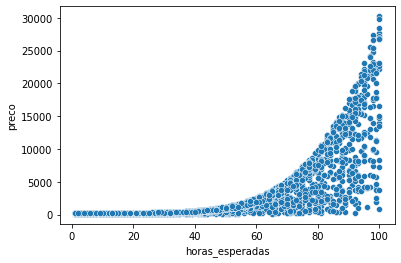

In [6]:
sns.scatterplot(x="horas_esperadas", y="preco", data=dados)

<AxesSubplot:xlabel='horas_esperadas', ylabel='preco'>

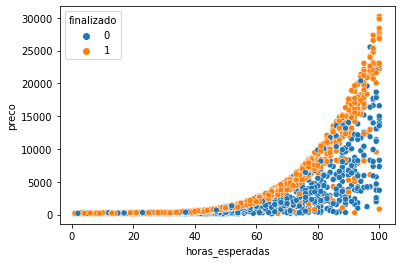

In [7]:
sns.scatterplot(x="horas_esperadas", y="preco", hue="finalizado", data=dados)

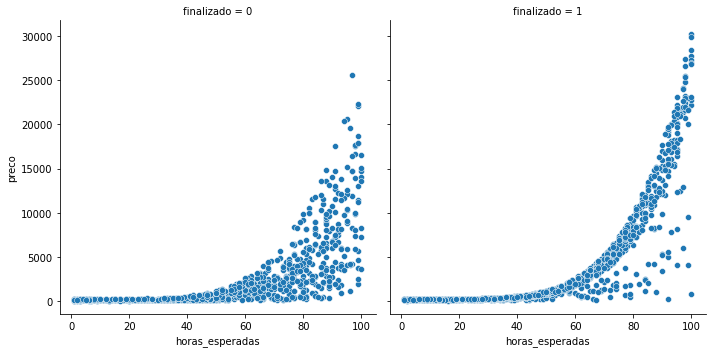

In [9]:
sns.relplot(x="horas_esperadas", y="preco", col="finalizado", data=dados)

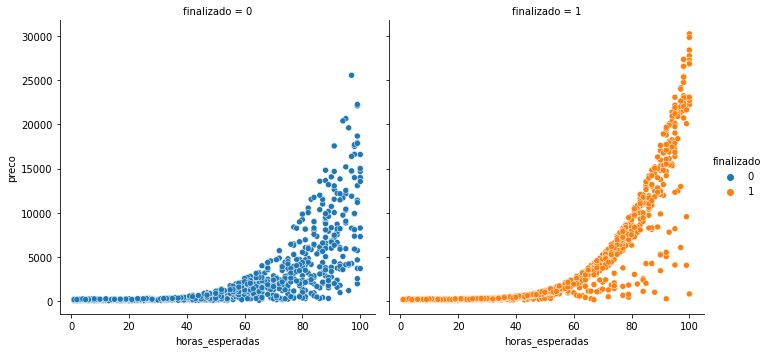

In [10]:
sns.relplot(x="horas_esperadas", y="preco", col="finalizado", hue="finalizado", data=dados)

### Separando em Variáveis Explicativas (X) e Variável Dependente (y)

In [11]:
X = dados[["horas_esperadas", "preco"]]
y = dados["finalizado"]

In [12]:
dados.shape

(2157, 4)

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score


In [23]:
SEED = 20

treino_x, teste_x, treino_y, teste_y = train_test_split(X, y,
                                                         random_state = SEED, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

modelo = LinearSVC(dual = False)
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 1617 elementos e testaremos com 540 elementos
A acurácia foi 54.44%


### Usando Baseline

Como saber se 54.44% de acurácia é um valor bom?

Vamos implementar um algoritmo bem simples que terá como previsão que todos os projetos são finalizados, isto é, os 540 elementos de teste serão 1.

In [24]:
import numpy as np
previsoes_do_guilherme = np.ones(540)
acuracia = accuracy_score(teste_y, previsoes_do_guilherme) * 100
print("A acurácia do Guilherme foi %.2f%%" % acuracia)

A acurácia do Guilherme foi 52.59%


O que chamamos de previsoes_do_guilherme, na verdade é a linha de base, ou baseline, e é o parâmetro que devemos superar quando construímos estimadores. Devemos ser muito melhores que as porcentagens apresentadas na baseline, e por isso é muito importante que ele exista ainda que teste sempre a mesma classe. Nas próximas aulas iremos analisar detalhadamente o que erramos para termos um acurácia tão baixa